In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal


In [3]:
class QuadraticState(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float
    result: str

In [ ]:
def show_equation(state: QuadraticState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

In [5]:
def calculate_discriminant(state: QuadraticState):
    discriminant = state['b']**2 - 4 * state['a'] * state['c']
    return {"discriminant": discriminant}

In [9]:
def real_roots( state: QuadraticState):
    root1 = (-state['b'] + state['discriminant']**0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2 * state['a'])

    result = f"Real roots: {root1} and {root2}"
    return {"result": result}

In [ ]:
def repeated_roots( state: QuadraticState):
    root = -state['b'] / (2 * state['a'])
    result = f"Repeated root: {root}"
    return {"result": result}

In [10]:
def no_real_roots( state: QuadraticState):
    result = "No real roots"
    return {"result": result}

In [ ]:
def check_condition(State: QuadraticState)-> Literal['real_roots', 'repeated_roots', 'no_real_roots']:
    if State['discriminant'] > 0:
        return 'real_roots'
    elif State['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

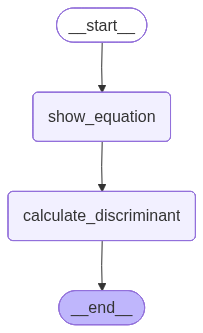

In [ ]:
graph = StateGraph(QuadraticState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('repeated_roots',repeated_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()
workflow

In [8]:
initial_state = {
    'a':1,
    'b':2,
    'c':3
}
final_state = workflow.invoke(initial_state)
final_state

{'a': 1, 'b': 2, 'c': 3, 'equation': '1x^2 + 2x + 3 = 0', 'discriminant': -8}